In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


c:\Users\pelik\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\pelik\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
c:\Users\pelik\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# ОБРАБОТКА НЕФТИ

In [114]:
brent = pd.read_csv('data/Brent.csv',sep=',',index_col=0)

In [115]:
brent

,Price,Open,Max,Min,Volume,Change
Date,,,,,,
10.05.2024,82.79,84.21,84.53,82.70,311.45K,-1.30
09.05.2024,83.88,83.79,84.33,83.45,309.45K,0.36
08.05.2024,83.58,83.02,83.82,81.71,395.43K,0.71
07.05.2024,82.99,83.74,83.82,82.42,NaN,-0.73
06.05.2024,83.60,83.24,83.83,82.78,NaN,0.42
...,...,...,...,...,...,...
08.01.2001,24.43,25.33,25.63,24.40,27.82K,-2.98
05.01.2001,25.18,25.40,26.02,25.15,34.99K,-0.67
04.01.2001,25.35,25.09,25.85,24.77,32.81K,1.28


In [116]:
idxb = pd.date_range('02-01-2001', '10-05-2024')

brent.index = pd.DatetimeIndex(brent.index)

brent = brent.reindex(idxb, fill_value=np.NAN)

In [117]:
brent.ffill(inplace=True)

In [119]:
brent.reset_index(inplace=True)

In [120]:
brent

,index,Price,Open,Max,Min,Volume,Change
0,2001-02-01,24.30,24.40,24.90,24.20,25.21K,1.80
1,2001-02-02,29.19,27.90,29.30,27.70,27.33K,3.88
2,2001-02-03,26.00,26.01,26.32,25.90,22.80K,0.58
3,2001-02-04,24.11,24.85,24.90,24.10,24.04K,-2.55
4,2001-02-05,27.59,27.80,27.89,27.51,34.38K,-2.61
...,...,...,...,...,...,...,...
8643,2024-10-01,76.80,77.48,78.73,76.38,353.70K,-1.02
8644,2024-10-02,76.80,77.48,78.73,76.38,353.70K,-1.02
8645,2024-10-03,76.80,77.48,78.73,76.38,353.70K,-1.02
8646,2024-10-04,90.48,89.55,90.71,88.83,371.23K,1.19


In [121]:
brent.to_csv('ready_data/brent.csv',encoding='utf-8')

<Axes: xlabel='index'>

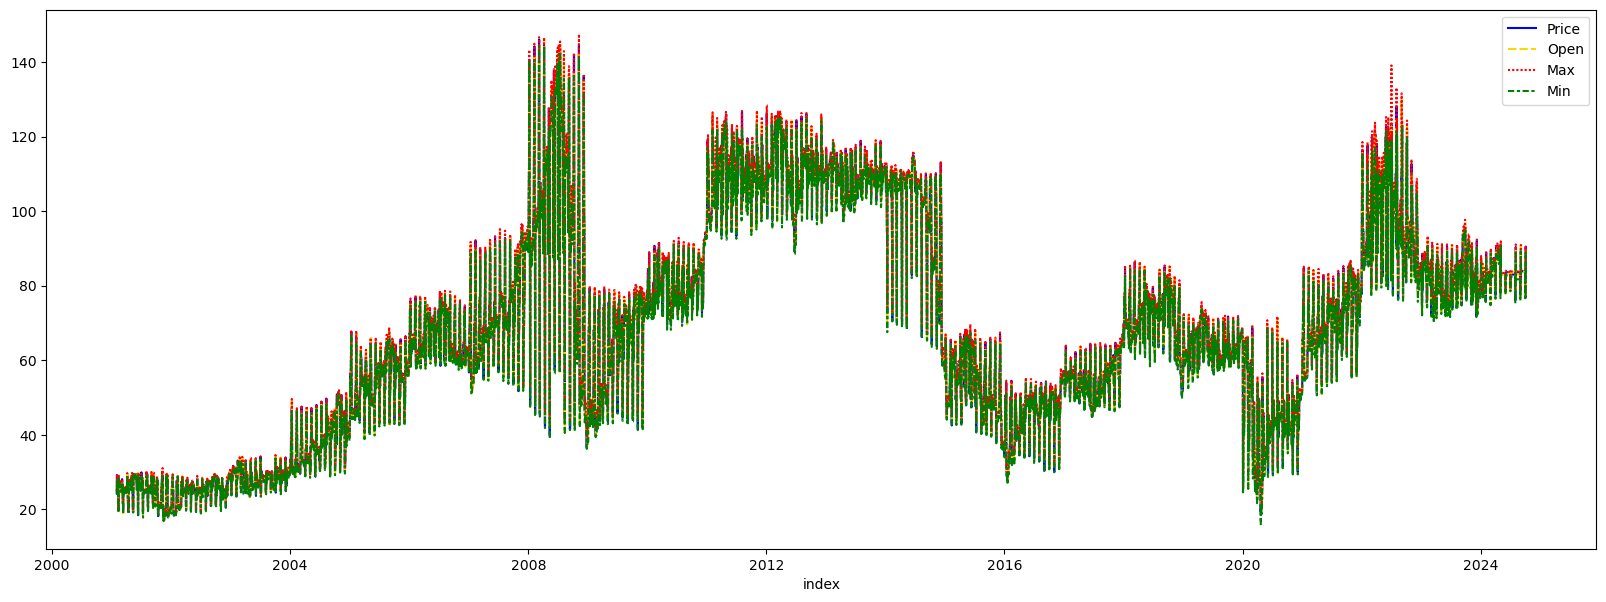

In [128]:
plt.figure(figsize=(20,7))
sns.lineplot(data=brent.set_index('index')[['Price','Open','Max','Min']],palette=['blue','gold','red','green'])

# ОБРАБОТКА ИНФЛЯЦИИ

In [4]:
inflation = pd.read_csv('data/inflation.csv',sep=',')

In [96]:
inflation = inflation[['Year',' Total']]

In [97]:
inflation

,Year,Total
0,2001,18.58
1,2002,15.06
2,2003,11.99
3,2004,11.74
4,2005,10.91
5,2006,9.00
6,2007,11.87
7,2008,13.28
8,2009,8.80
9,2010,8.78


In [98]:
inflation['Year'] ='01-01-' + inflation['Year'].astype('str')

C:\Users\pelik\AppData\Local\Temp\ipykernel_4328\1597051437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflation['Year'] ='01-01-' + inflation['Year'].astype('str')


In [99]:
inflation.Year = inflation.Year.astype('datetime64[ns]')

C:\Users\pelik\AppData\Local\Temp\ipykernel_4328\3752068534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflation.Year = inflation.Year.astype('datetime64[ns]')


In [100]:
p = pd.date_range(start='01-01-2001', end='05-10-2024', freq='D')
pp = pd.DataFrame(p, columns=['Year'])

# Объединяем исходный df с df_full
inflation = pp.merge(inflation, on='Year', how='left')

In [101]:
inflation.ffill(inplace=True)

In [102]:
inflation

,Year,Total
0,2001-01-01,18.58
1,2001-01-02,18.58
2,2001-01-03,18.58
3,2001-01-04,18.58
4,2001-01-05,18.58
...,...,...
8526,2024-05-06,7.42
8527,2024-05-07,7.42
8528,2024-05-08,7.42
8529,2024-05-09,7.42


In [103]:
inflation.to_csv('ready_data/inflation.csv',encoding='utf-8')

# ОБРАБОТКА KLUCH

In [85]:
kluch = pd.read_csv('data/kluch.csv',sep=';',index_col=0)

In [87]:
kluch

,stavka
date,
16.02.2024,16.0
15.12.2023,16.0
27.10.2023,15.0
15.09.2023,13.0
15.08.2023,12.0
...,...
02.06.1993,110.0
30.03.1993,100.0
23.05.1992,80.0


In [88]:
idx0 = pd.date_range('01-01-1992', '10-05-2024')

kluch.index = pd.DatetimeIndex(kluch.index)

kluch = kluch.reindex(idx0, fill_value=np.NAN)

In [89]:
kluch.ffill(inplace=True)

In [90]:
kluch

,stavka
1992-01-01,20.0
1992-01-02,20.0
1992-01-03,20.0
1992-01-04,20.0
1992-01-05,20.0
...,...
2024-10-01,16.0
2024-10-02,16.0
2024-10-03,16.0
2024-10-04,16.0


In [91]:
kluch.to_csv('ready_data/kluch.csv',encoding='utf-8')

# ОБРАБОТКА USD

In [8]:
usd = pd.read_csv('data/USD_RUB.csv',sep=',',index_col=0)

In [9]:
usd

,Price,Open,Max,Min,Change
Date,,,,,
10.05.2024,92.2550,91.9500,92.4407,91.7275,0.33
08.05.2024,91.9500,91.1075,92.1281,91.1075,0.92
07.05.2024,91.1075,91.3475,91.4175,90.9277,-0.26
06.05.2024,91.3475,91.6000,92.0779,90.8618,-0.28
03.05.2024,91.6000,92.0500,92.1625,91.4504,-0.49
...,...,...,...,...,...
20.09.2001,29.4300,29.4550,29.4760,29.4030,-0.08
19.09.2001,29.4530,29.4600,29.4810,29.4300,-0.02
18.09.2001,29.4600,29.4450,29.4750,29.4400,0.00


In [10]:
idx = pd.date_range('14-09-2001', '10-05-2024')

usd.index = pd.DatetimeIndex(usd.index)

usd = usd.reindex(idx, fill_value=np.NAN)

In [11]:
usd.ffill(inplace=True)

In [12]:
usd.reset_index(inplace=True)

In [13]:
usd

,index,Price,Open,Max,Min,Change
0,2001-09-14,29.4730,29.3500,29.4800,29.3500,0.00
1,2001-09-15,29.4730,29.3500,29.4800,29.3500,0.00
2,2001-09-16,29.4730,29.3500,29.4800,29.3500,0.00
3,2001-09-17,29.4610,29.4600,29.4730,29.4400,-0.04
4,2001-09-18,29.4600,29.4450,29.4750,29.4400,0.00
...,...,...,...,...,...,...
8418,2024-10-01,89.3300,89.8975,90.0550,89.0489,-0.63
8419,2024-10-02,89.3300,89.8975,90.0550,89.0489,-0.63
8420,2024-10-03,89.3300,89.8975,90.0550,89.0489,-0.63
8421,2024-10-04,93.4325,93.0000,93.5713,92.8384,0.47


In [78]:
usd.to_csv('ready_data/usd.csv',encoding='utf-8')

<Axes: >

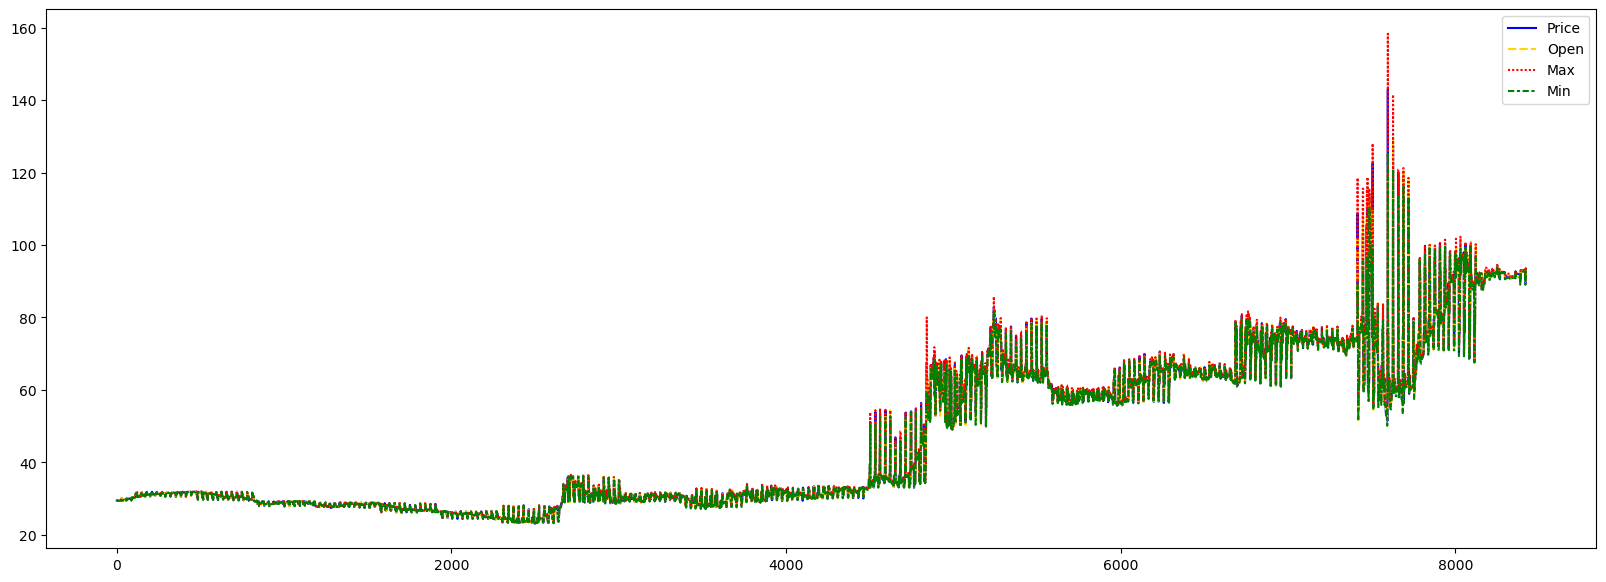

In [19]:
plt.figure(figsize=(20,7))
sns.lineplot(data=usd[['Price','Open','Max','Min']],palette=['blue','gold','red','green'])

# ОБРАБОТКА GDP

In [62]:
vvp = pd.read_csv('data/vvp.csv',sep = ';')

In [11]:
# vvp['vvp'] = vvp['vvp']*1000000000.0 

In [63]:
vvp

,year,vvp
0,2001,328.5
1,2002,370.1
2,2003,461.5
3,2004,633.3
4,2005,817.7
5,2006,1060.9
6,2007,1393.4
7,2008,1779.1
8,2009,1307.9
9,2010,1633.1


In [64]:
vvp['year'] ='01-01-' + vvp['year'].astype('str')

In [71]:
vvp.year = vvp.year.astype('datetime64[ns]')

In [72]:
r = pd.date_range(start='01-01-2001', end='05-10-2024', freq='D')
rr = pd.DataFrame(r, columns=['year'])

# Объединяем исходный df с df_full
vvp = rr.merge(vvp, on='year', how='left')

In [75]:
vvp.vvp.ffill(inplace=True)

C:\Users\pelik\AppData\Local\Temp\ipykernel_4328\3343703737.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vvp.vvp.ffill(inplace=True)


In [82]:
vvp

,year,vvp
0,2001-01-01,328.5
1,2001-01-02,328.5
2,2001-01-03,328.5
3,2001-01-04,328.5
4,2001-01-05,328.5
...,...,...
8526,2024-05-06,1997.0
8527,2024-05-07,1997.0
8528,2024-05-08,1997.0
8529,2024-05-09,1997.0


In [77]:
vvp.to_csv('ready_data/vvp.csv',encoding='utf-8')

<Axes: xlabel='year', ylabel='vvp'>

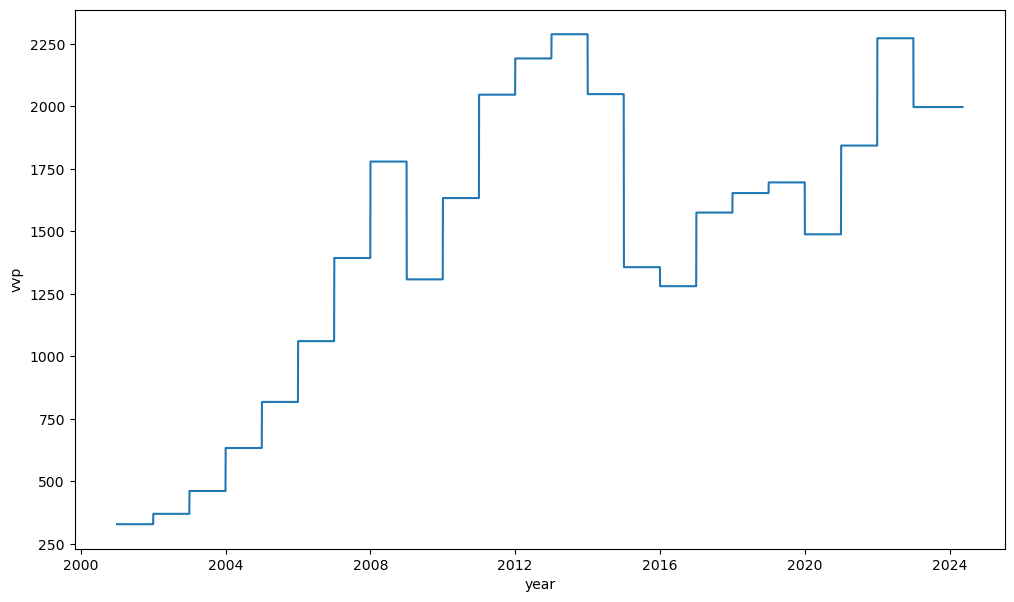

In [84]:
plt.figure(figsize=(12,7))
sns.lineplot(data=vvp,y='vvp',x='year')

# CREATING DF

In [13]:
magnit = pd.read_csv('data/MGNT.csv',sep=',')

In [14]:
magnit

,Date,Price,Open,Max,Min,Volume,Change
0,10.05.2024,8.370.5,8.250.0,8.380.5,8.250.0,104.68K,1.50
1,08.05.2024,8.247.0,8.268.0,8.311.0,8.238.0,105.00K,-0.24
2,07.05.2024,8.267.0,8.210.0,8.294.0,8.203.5,134.66K,0.70
3,06.05.2024,8.209.5,8.269.0,8.306.5,8.185.0,96.38K,-0.61
4,03.05.2024,8.259.5,8.284.0,8.321.0,8.228.5,133.21K,-0.28
...,...,...,...,...,...,...,...
4425,16.06.2006,545.0,540.1,545.0,540.1,0.80K,-8.71
4426,15.06.2006,597.0,595.0,620.0,595.0,6.50K,0.00
4427,14.06.2006,597.0,600.0,600.0,595.0,3.10K,-7.30
4428,08.06.2006,644.0,635.3,644.0,630.1,0.90K,1.26
